In [26]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy as cp
import cartopy.feature as cfeature
import cartopy.crs as ccrs

In [3]:
data = xr.open_dataset('india.1960.1990.pre.JJAS.nc')

In [7]:
# choosung the precipitation variable names pre

data = data.pre

In [8]:
data

<xarray.DataArray 'pre' (time: 124, lat: 58, lon: 100)>
[719200 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1960-06-16 1960-07-16 ... 1990-09-16
  * lon      (lon) float32 60.25 60.75 61.25 61.75 ... 108.2 108.8 109.2 109.8
  * lat      (lat) float32 6.25 6.75 7.25 7.75 8.25 ... 33.25 33.75 34.25 34.75
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [9]:
mean_data = xr.open_dataset('india.mean.1960.1990.pre.JJAS.nc')

In [11]:
mean_data = mean_data.pre

In [12]:
mean_data

<xarray.DataArray 'pre' (time: 1, lat: 58, lon: 100)>
[5800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1975-07-31T12:00:00
  * lon      (lon) float32 60.25 60.75 61.25 61.75 ... 108.2 108.8 109.2 109.8
  * lat      (lat) float32 6.25 6.75 7.25 7.75 8.25 ... 33.25 33.75 34.25 34.75
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    cell_methods:                time: mean
    correlation_decay_distance:  450.0

In [13]:
time = mean_data.time

In [17]:
print(len(time))

1


In [18]:
anomaly_data = xr.open_dataset('anomaly.jjas.nc')

In [19]:
anomaly_data = anomaly_data.pre

In [20]:
anomaly_data

<xarray.DataArray 'pre' (time: 144, lat: 58, lon: 100)>
[835200 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-06-16 1980-07-16 ... 2015-09-16
  * lon      (lon) float32 60.25 60.75 61.25 61.75 ... 108.2 108.8 109.2 109.8
  * lat      (lat) float32 6.25 6.75 7.25 7.75 8.25 ... 33.25 33.75 34.25 34.75
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [21]:
std_data = xr.open_dataset('std.anomaly.jjas.nc')

In [22]:
std_data = std_data.pre

In [23]:
std_data

<xarray.DataArray 'pre' (time: 1, lat: 58, lon: 100)>
[5800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1998-01-30T12:00:00
  * lon      (lon) float32 60.25 60.75 61.25 61.75 ... 108.2 108.8 109.2 109.8
  * lat      (lat) float32 6.25 6.75 7.25 7.75 8.25 ... 33.25 33.75 34.25 34.75
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [24]:
std_data.time

<xarray.DataArray 'time' (time: 1)>
array(['1998-01-30T12:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1998-01-30T12:00:00
Attributes:
    standard_name:  time
    long_name:      time
    bounds:         time_bnds
    axis:           T

In [28]:
std_data_mean = std_data.mean(dim='time')

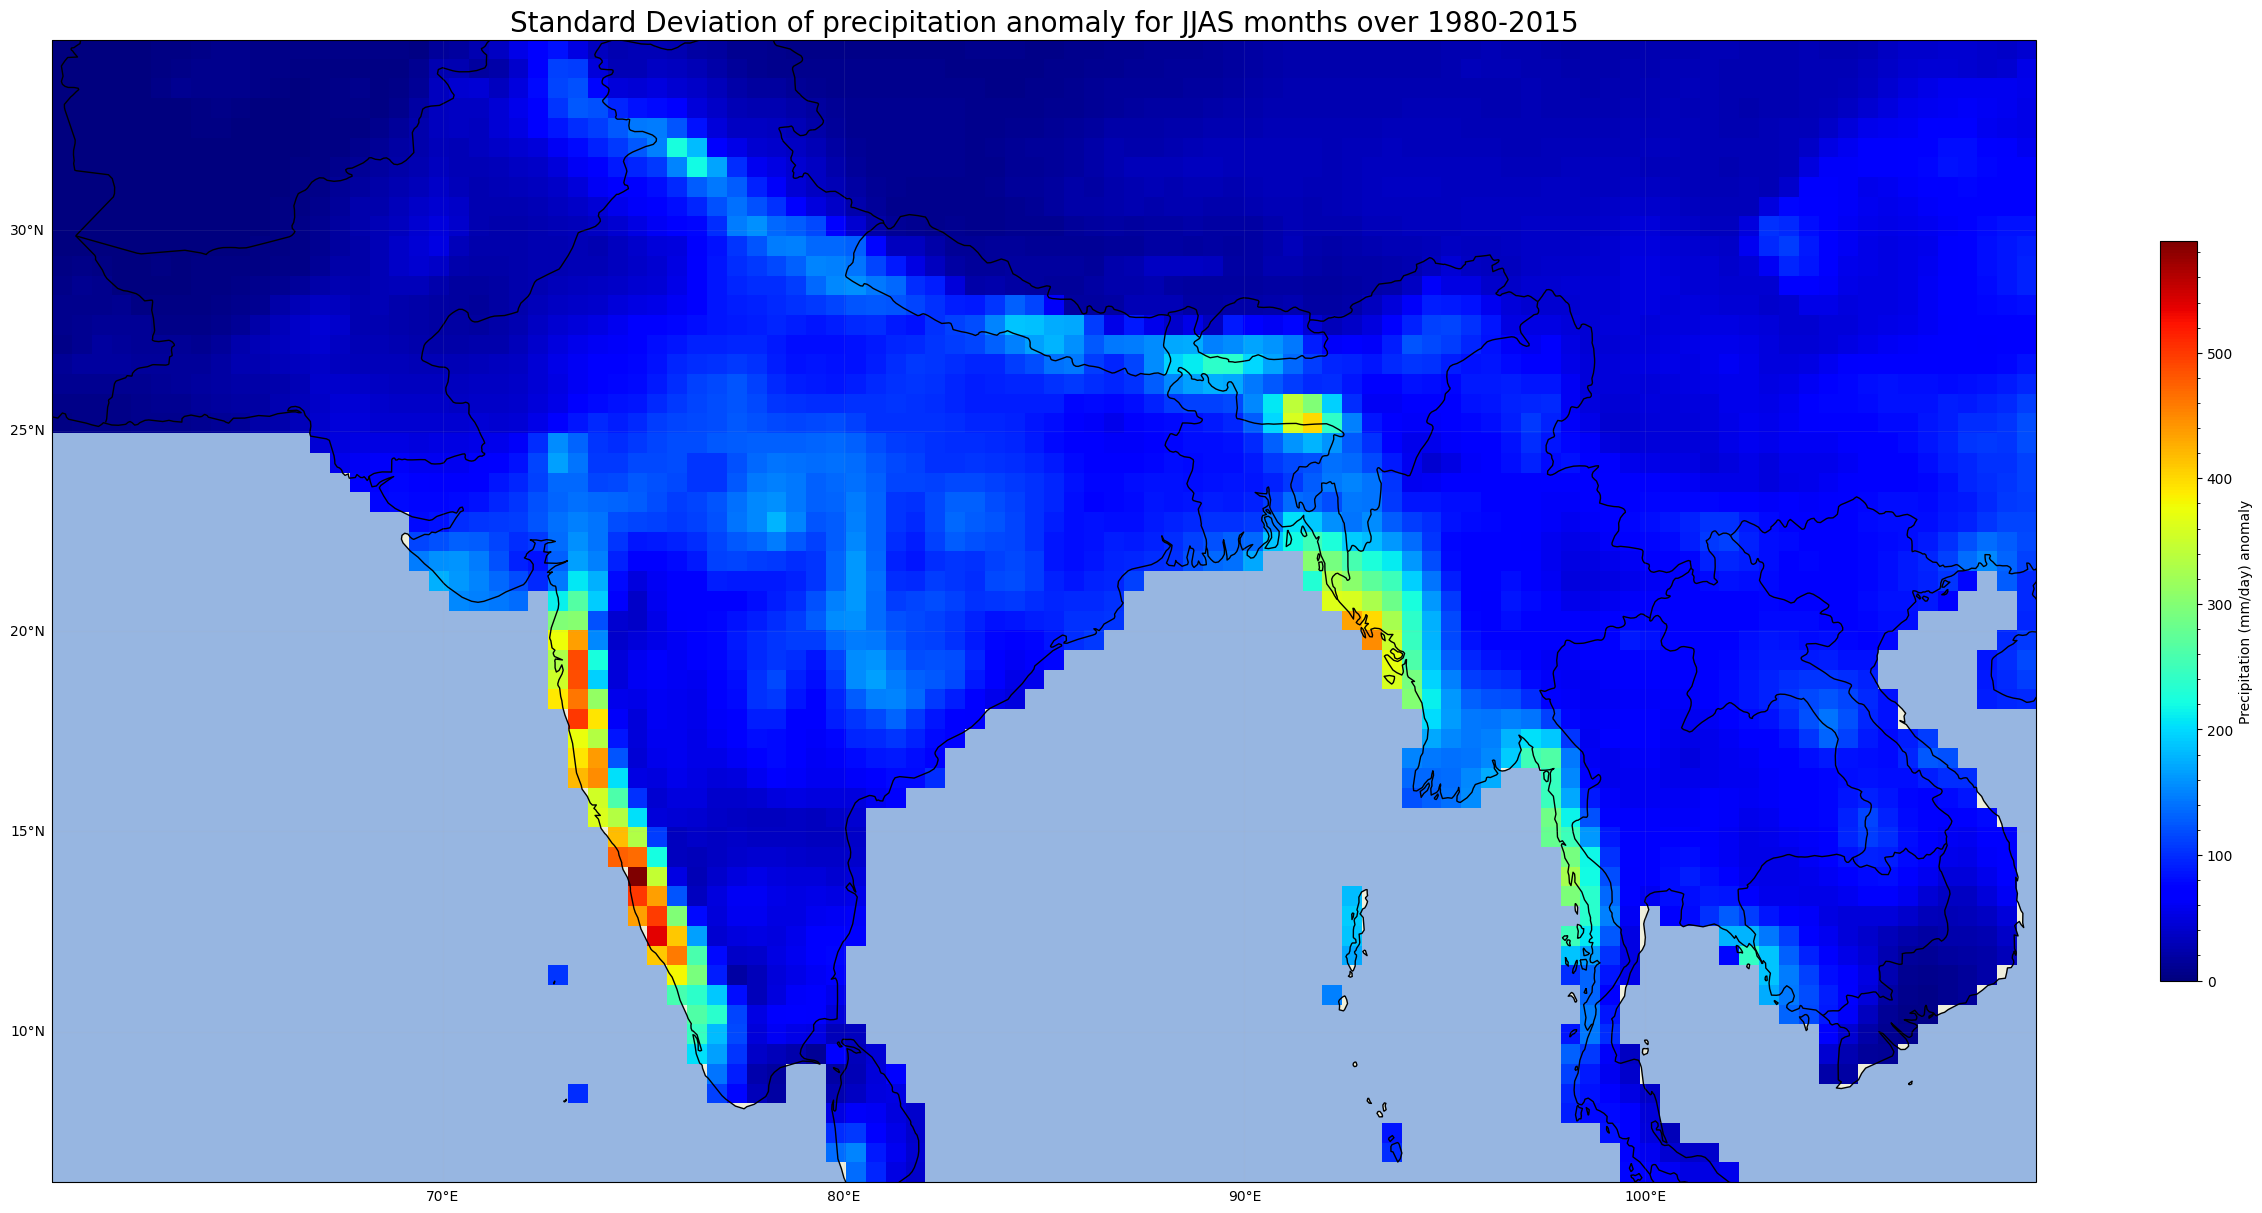

In [33]:
# importing the required libraries

# import numpy as np
# import matplotlib.pyplot as plt
# import xarray as xr


# # loading the cru datasets 

# t_min_mam = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/lab_session_02/cru_tmn.1981.2020_MAM.nc')
# t_max_mam = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/lab_session_02/cru_tmx.1981.2020_MAM.nc')
# # t_max_dataset

# t_min_mam = t_min_mam.tmn
# t_max_mam = t_max_mam.tmx

lon = std_data.lon
lat = std_data.lat


# t_min_mam_mean = t_min_mam.mean(dim='time')
# t_max_mam_mean = t_max_mam.mean(dim='time')

# # difference between t_min_mam and t_max_mam to get the diurnal temperature range for mam months

# t_dtr_mam = t_max_mam_mean - t_min_mam_mean



fig = plt.figure(figsize=(32,32))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

mp = ax.imshow(std_data_mean,extent=(lon.min(),lon.max(),lat.min(),lat.max()),cmap='jet',origin='lower')
plt.title('Standard Deviation of precipitation anomaly for JJAS months over 1980-2015',fontsize=20)
# plt.legend(['Temp'])

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
ax.add_feature(cfeature.BORDERS,edgecolor='black')
# ax.add_feature(states_provinces, edgecolor='black')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)


cbar = fig.colorbar(mp, shrink=0.3,label='Precipitation (mm/day) anomaly')
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False

# plt.savefig("/home/shiv/Documents/GitHub/EES405/plots/assignment_1/Diurnal temperature range 1981-2020 for MAM months",dpi=600)